In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('/content/open_pubs.csv',names=['id','name','address','postcode','easting','northing','latitude','longitude','local_authority'])
df.head()

,id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


In [4]:
df.shape

(51331, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [6]:
df.isnull().sum()

id                 0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.latitude.value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.369771      1
53.390799      1
53.371238      1
53.361078      1
53.076638      1
Name: latitude, Length: 46810, dtype: int64

In [11]:
df.replace('\\N',np.nan,inplace=True)

In [12]:
df.isnull().sum()

id                   0
name                 0
address              0
postcode             0
easting              0
northing             0
latitude           767
longitude          767
local_authority      0
dtype: int64

In [13]:
# Drop all

df = df.dropna()

In [14]:
df.isnull().sum()

id                 0
name               0
address            0
postcode           0
easting            0
northing           0
latitude           0
longitude          0
local_authority    0
dtype: int64

In [15]:
df.shape

(50564, 9)

In [16]:
df.latitude = df.latitude.astype(float)
df.longitude = df.longitude.astype(float)

<ipython-input-16-61d615964de8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.latitude = df.latitude.astype(float)
<ipython-input-16-61d615964de8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.longitude = df.longitude.astype(float)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50564 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50564 non-null  int64  
 1   name             50564 non-null  object 
 2   address          50564 non-null  object 
 3   postcode         50564 non-null  object 
 4   easting          50564 non-null  int64  
 5   northing         50564 non-null  int64  
 6   latitude         50564 non-null  float64
 7   longitude        50564 non-null  float64
 8   local_authority  50564 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.9+ MB


In [19]:
df.local_authority.value_counts().head(10)

County Durham        680
Leeds                611
Cornwall             557
Wiltshire            544
Kirklees             524
City of Edinburgh    506
Birmingham           494
Buckinghamshire      485
Bradford             478
Northumberland       446
Name: local_authority, dtype: int64

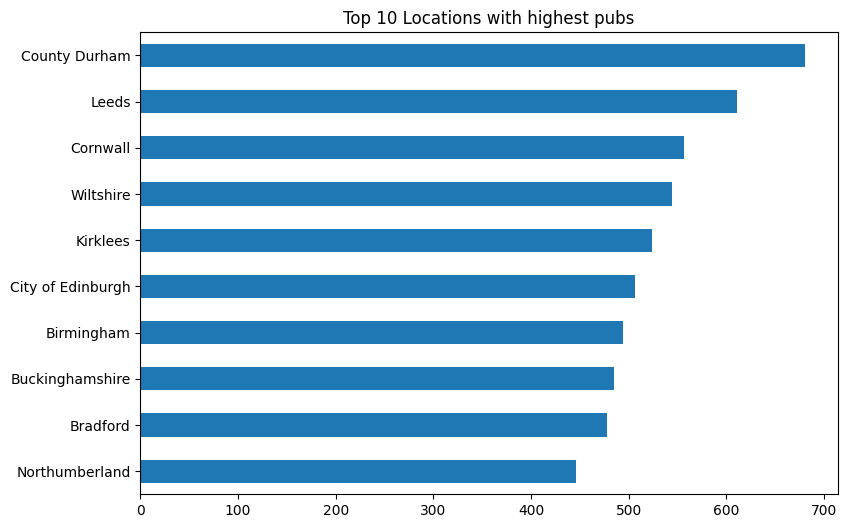

In [21]:
colors = plt.cm.Set3(range(10))
df.local_authority.value_counts().head(10).sort_values().plot(kind='barh', figsize=(9,6), title="Top 10 Locations with highest pubs")
plt.savefig('pubs_by_location.png', dpi=300, bbox_inches='tight')
plt.show()

### ***Visualize Location***

In [22]:
# Create a map object with a starting location and zoom level

map = folium.Map(location=[51.970379, 0.979340], zoom_start=12)

# Add a marker to the map

folium.Marker(location=[51.970379, 0.979340], tooltip='Open Pub' , popup='Anchor Inn').add_to(map)

# Anchor Inn

# Display the map
map

In [23]:
df.to_csv("cleaned.csv", index=False)

In [24]:
df1 = pd.read_csv('cleaned.csv')

In [25]:

df1.head()

,id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
4,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
